<h1>Blurring and Smoothing</h1>
 
Smoothing and blurring is one of the most important preprocessing steps in all of computer vision and image processing. By smoothing an image prior to applying techniques such as edge detection or thresholding we are able to reduce the amount of high-frequency content, such as noise and edges (i.e., the “detail” of an image).

While this may sound counter-intuitive, by reducing the detail in an image we can more easily find objects that we are interested in.

Furthermore, this allows us to focus on the larger structural objects in the image.

In [ ]:
# import the necessary packages
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load the image, display it to our screen
image = cv2.imread("data/disinfection.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()


<h3>Average blurring ( cv2.blur )</h3>

The first blurring method we are going to explore is averaging.

An average filter takes an area of pixels surrounding a central pixel, averages all these pixels together, and replaces the central pixel with the average.

By taking the average of the region surrounding a pixel, we are smoothing it and replacing it with the value of its local neighborhood. This allows us to reduce noise and the level of detail, simply by relying on the average.

Remember when we discussed kernels and convolutions? Well, it turns out that we can use kernels for not only edge detection and gradients, but for averaging as well!

To accomplish our average blur, we’ll actually be convolving our image with an M x N normalized filter where both M and N are both odd integers.
The pixel at the center of the kernel (and hence why we have to use an odd number, otherwise there would not be a true “center”) is then set to be the average of all other pixels surrounding it.

In [ ]:
# initialize a list of
# kernel sizes (so we can evaluate the relationship between kernel
# size and amount of blurring)
kernelSizes = [(3, 3), (9, 9), (15, 15)]

# loop over the kernel sizes
for (kX, kY) in kernelSizes:
    # apply an "average" blur to the image using the current kernel
    # size
    blurred = cv2.blur(image, (kX, kY))
    cv2.imshow("Average ({}, {})".format(kX, kY), blurred)
    cv2.waitKey(0)

<h3>Gaussian blurring ( cv2.GaussianBlur)</h3>

Gaussian blurring is similar to average blurring, but instead of using a simple mean, we are now using a weighted mean, where neighborhood pixels that are closer to the central pixel contribute more “weight” to the average.

And as the name suggests, Gaussian smoothing is used to remove noise that approximately follows a Gaussian distribution.

The end result is that our image is less blurred, but more “naturally blurred,” than using the average method discussed in the previous section. Furthermore, based on this weighting we’ll be able to preserve more of the edges in our image as compared to average smoothing.

Just like an average blurring, Gaussian smoothing also uses a kernel of M x N, where both M and N are odd integers.

In [ ]:
# close all windows to cleanup the screen
cv2.destroyAllWindows()
cv2.imshow("Original", image)

# loop over the kernel sizes again
for (kX, kY) in kernelSizes:
    # apply a "Gaussian" blur to the image
    blurred = cv2.GaussianBlur(image, (kX, kY), 0)
    cv2.imshow("Gaussian ({}, {})".format(kX, kY), blurred)
    cv2.waitKey(0)

<h3>Median blurring ( cv2.medianBlur )</h3>

Traditionally, the median blur method has been most effective when removing salt-and-pepper noise. This type of noise is exactly what it sounds like: imagine taking a photograph, putting it on your dining room table, and sprinkling salt and pepper on top of it. Using the median blur method, you could remove the salt and pepper from your image.

When applying a median blur, we first define our kernel size. Then, as in the averaging blurring method, we consider all pixels in the neighborhood of size K \times K where K is an odd integer.

Notice how, unlike average blurring and Gaussian blurring where the kernel size could be rectangular, the kernel size for the median must be square. Furthermore (unlike the averaging method), instead of replacing the central pixel with the average of the neighborhood, we instead replace the central pixel with the median of the neighborhood.

The reason median blurring is more effective at removing salt-and-pepper style noise from an image is that each central pixel is always replaced with a pixel intensity that exists in the image. And since the median is robust to outliers, the salt-and-pepper noise will be less influential to the median than another statistical method, such as the average.

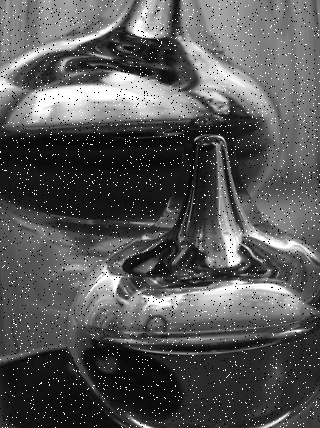

In [ ]:
# HOMEWORK: Find an image with salt and pepper noise

# close all windows to cleanup the screen

# loop over the kernel sizes and blur the new image with Median blurring


# Bilateral blurring ( cv2.bilateralFilter )

The last method we are going to explore is bilateral blurring.

Thus far, the intention of our blurring methods have been to reduce noise and detail in an image; however, as a side effect we have tended to lose edges in the image.

To reduce noise while still maintaining edges, we can use bilateral blurring. Bilateral blurring accomplishes this by introducing two Gaussian distributions.

The first Gaussian function only considers spatial neighbors. That is, pixels that appear close together in the (x, y)-coordinate space of the image. The second Gaussian then models the pixel intensity of the neighborhood, ensuring that only pixels with similar intensity are included in the actual computation of the blur.

Intuitively, this makes sense. If pixels in the same (small) neighborhood have a similar pixel value, then they likely represent the same object. But if two pixels in the same neighborhood have contrasting values, then we could be examining the edge or boundary of an object — and we would like to preserve this edge.

Overall, this method is able to preserve edges of an image, while still reducing noise. The largest downside to this method is that it is considerably slower than its averaging, Gaussian, and median blurring counterparts.

In [ ]:
# load my a new image, display it to our screen
image = cv2.imread("data/guy.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

In [ ]:
# construct a list of
# bilateral filtering parameters that we are going to explore
params = [(11, 21, 7), (11, 41, 21), (11, 61, 39)]

# loop over the diameter, sigma color, and sigma space
for (diameter, sigmaColor, sigmaSpace) in params:
    # apply bilateral filtering to the image using the current set of
    # parameters
    blurred = cv2.bilateralFilter(image, diameter, sigmaColor, sigmaSpace)
    # show the output image and associated parameters
    print("Blurred d={}, sc={}, ss={}".format(
        diameter, sigmaColor, sigmaSpace))
    blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
    plt.imshow(blurred_rgb)
    plt.show()

More here: https://www.pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/